# Importing necessary libraries & parameter setup

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading files

In [17]:
test1=pd.read_csv("/home/java/Desktop/HORIZON2020/DATASETS/st/02_District_wise_crimes_committed_against_ST_2001_2012.csv")
test2=pd.read_csv("/home/java/Desktop/HORIZON2020/DATASETS/st/02_District_wise_crimes_committed_against_ST_2013.csv")

#test1=pd.read_csv("C:/Users/abhishek/Desktop/PROJECT/HORIZON2020_step towards crime free india/DATA SETS/st/02_District_wise_crimes_committed_against_ST_2001_2012.csv")
#test2=pd.read_csv("C:/Users/abhishek/Desktop/PROJECT/HORIZON2020_step towards crime free india/DATA SETS/st/02_District_wise_crimes_committed_against_ST_2013.csv")

## Merging and reorganising data

In [18]:
merged_data=pd.concat([test1,test2])

In [19]:
final=merged_data[merged_data.DISTRICT != 'TOTAL']
reorganised=final[['STATE/UT','DISTRICT','Year','Murder','Rape','Kidnapping Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against STs']]

## Data cleaning

In [20]:
pv=reorganised.rename(columns={'STATE/UT' : "STATE_UT"})

In [21]:
pv['STATE_UT'] = pv.STATE_UT.apply(str.upper)
pv['STATE_UT'] = pv.STATE_UT.apply(lambda x:x.replace("DELHI UT","DELHI"))
pv['STATE_UT'] = pv.STATE_UT.apply(lambda x:x.replace("D & N HAVELI","D&N HAVELI"))
pv['STATE_UT'] = pv.STATE_UT.apply(lambda x:x.replace("A & N ISLANDS","A&N ISLANDS"))


## Cross check cleaning

In [22]:
states=pv.STATE_UT.unique()

## Data aggregration

In [23]:
year_totals = pv.groupby('Year')
year_agg = year_totals.sum().reset_index()

year_agg=year_agg.rename(columns={'Kidnapping and Abduction':'Kidnapping','Prevention of atrocities (POA) Act':'POA','Protection of Civil Rights (PCR) Act':'PCR','Other Crimes Against SCs':'Other'})
year_agg

,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,POA,PCR,Other Crimes Against STs
0,2001,167,573,67,16,73,108,756,1667,58,2732
1,2002,189,596,69,37,62,58,788,1800,47,3124
2,2003,185,551,69,30,46,38,790,1340,37,2798
3,2004,156,566,79,40,50,33,767,1175,11,2658
4,2005,164,640,72,27,49,38,767,1283,162,2511
5,2006,195,701,88,12,29,46,840,1232,49,2604
6,2007,140,627,89,9,21,54,855,1104,5,2628
7,2008,124,585,87,13,17,46,777,882,6,2855
8,2009,122,589,66,3,22,27,715,822,2,2882
9,2010,124,640,69,7,5,33,917,1037,5,2927


In [24]:
year_agg.describe()

,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,POA,PCR,Other Crimes Against STs
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2007.00000,162.230769,712.538462,96.538462,17.076923,31.692308,45.923077,880.846154,1352.846154,33.923077,3060.000000
std,3.89444,34.766252,302.378795,52.922294,12.399338,21.822712,22.662236,298.513218,507.703300,44.150239,1076.075121
min,2001.00000,122.000000,551.000000,66.000000,3.000000,5.000000,24.000000,715.000000,822.000000,2.000000,2511.000000
25%,2004.00000,140.000000,585.000000,69.000000,7.000000,15.000000,33.000000,767.000000,1104.000000,5.000000,2658.000000
50%,2007.00000,156.000000,627.000000,79.000000,13.000000,22.000000,38.000000,790.000000,1232.000000,11.000000,2759.000000
75%,2010.00000,185.000000,701.000000,89.000000,27.000000,49.000000,54.000000,840.000000,1340.000000,49.000000,2882.000000
max,2013.00000,244.000000,1694.000000,260.000000,40.000000,73.000000,108.000000,1860.000000,2780.000000,162.000000,6602.000000


## Comparing various factors among

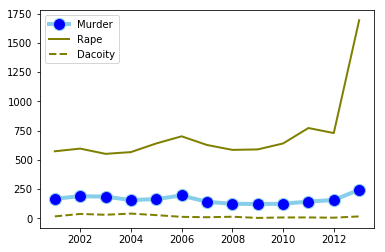

In [25]:
plt.plot('Year','Murder',data=year_agg,marker='o',markerfacecolor='blue',markersize=12,color='skyblue',linewidth=4)
plt.plot( 'Year', 'Rape', data=year_agg, marker='', color='olive', linewidth=2)
plt.plot( 'Year','Dacoity', data=year_agg, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()
